# Test Normal model implementation

In [2]:
import numpy as np
import pandas as pd
from option_models import bsm
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [3]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: 
 [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy         mc           gap
strike                                               
80      21.185930  21.185930  21.178324 -8.526513e-14
81      20.348379  20.348379  20.462848 -4.263256e-14
82      19.526455  19.526455  19.422134 -4.263256e-14
83      18.720866  18.720866  18.649592 -4.263256e-14
84      17.932279  17.932279  18.073948 -5.684342e-14
85      17.161318  17.161318  17.276117 -5.684342e-14
86      16.408558  16.408558  16.346083 -5.684342e-14
87      15.674521  15.674521  15.772426 -5.684342e-14
88      14.959672  14.959672  14.883613 -6.394885e-14
89      14.264418  14.264418  14.524373 -5.684342e-14
90      13.589108  13.589108  13.524603 -6.394885e-14
91      12.934027  12.934027  13.138092 -8.526513e-14
92      12.299398  12.299398  12.474970 -5.684342e-14
93      11.685384  11.685384  11.576214 -7.815970e-14
94      11.0920

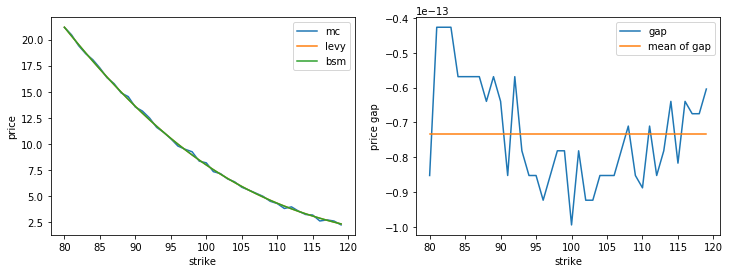

In [5]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m: \n',cor_m)

basket1 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
bsmList=[]
mcList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(bsm.bsm_price(strike, spot[0], vol[0], texp, intr, divr[0], cp_sign=1))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket1.price_Levy(strike, spot, texp, intr))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList,'bsm':bsmList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)
print('------DEV------')
print (np.sqrt((priceFrm.gap**2).mean()))
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax1.plot(strikeRange,bsmList,label='bsm')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()

In [10]:
def plotGap(mcList,levyList,var,varRange):
    priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=varRange)
    priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
    priceFrm.index.name=var
    print (priceFrm)
    print('------DEV------')
    print (np.sqrt((priceFrm.gap**2).mean()))
    fig=plt.figure(figsize=(12,4))
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)
    ax1.plot(varRange,mcList,'o''-',label='mc')
    ax1.plot(varRange,levyList,'*''-',label='levy')
    ax2.plot(varRange,priceFrm.gap,label='gap')
    ax2.plot(varRange,[np.mean(priceFrm.gap)]*len(varRange),label='mean of gap')
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('price')
    ax2.set_ylabel('price gap')
    plt.show()
    return 

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
             levy         mc       gap
strike                                
80      21.185787  21.212654 -0.026868
81      20.348226  20.386105 -0.037879
82      19.526291  19.642105 -0.115814
83      18.720690  18.874279 -0.153589
84      17.932092  17.746321  0.185771
85      17.161121  17.556122 -0.395001
86      16.408350  16.163847  0.244503
87      15.674303  15.718177 -0.043874
88      14.959444  14.918924  0.040520
89      14.264181  14.292697 -0.028515
90      13.588862  13.456618  0.132244
91      12.933772  12.801494  0.132279
92      12.299136  12.273793  0.025343
93      11.685115  11.728159 -0.043044
94      11.091810  11.297723 -0.205914
95      10.519260  10.676249 -0.156989
96       9.967449   9.877585  0.089864
97       9.436299   9.482683 -0.046384
98       8.925682   9.005595 -0.079

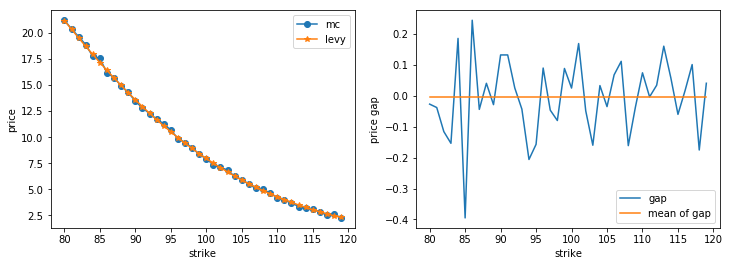

In [11]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m: \n',cor_m)

basket2 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket2.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

In [12]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
             levy         mc       gap
strike                                
80      36.398241  37.292246 -0.894004
81      35.921035  35.270801  0.650233
82      35.450670  35.016175  0.434495
83      34.987055  34.440076  0.546979
84      34.530098  34.650116 -0.120018
85      34.079709  34.386469 -0.306760
86      33.635796  33.092731  0.543065
87      33.198270  32.867041  0.331229
88      32.767041  32.872925 -0.105884
89      32.342021  30.793666  1.548355
90      31.923122  31.810931  0.112191
91      31.510255  31.720752 -0.210496
92      31.103336  31.749563 -0.646227
93      30.702278  30.463508  0.238770
94      30.306996  29.596412  0.710584
95      29.917406  30.015825 -0.098418
96      29.533426  28.439659  1.093767
97      29.154973  28.335392  0.819581
98      28.781965  28.218703  0.563262
99      28.414323  27.702350  0.711973
100  

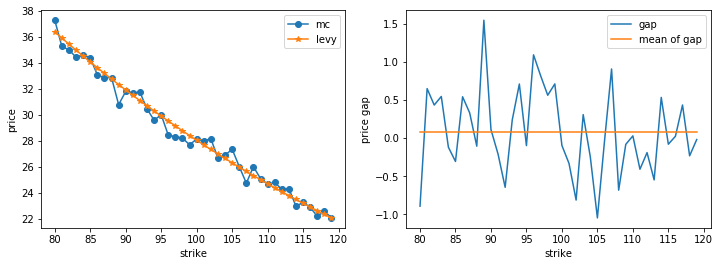

In [13]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m: \n',cor_m)

basket3 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket3.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

In [14]:
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5

           levy         mc       gap
cor                                 
0.10  15.782731  15.194456  0.588275
0.30  19.034427  18.604016  0.430411
0.50  22.072675  21.657399  0.415276
0.70  24.939585  24.422231  0.517354
0.80  26.317255  25.737706  0.579549
0.95  28.320635  28.071077  0.249558
------DEV------
0.477770429534


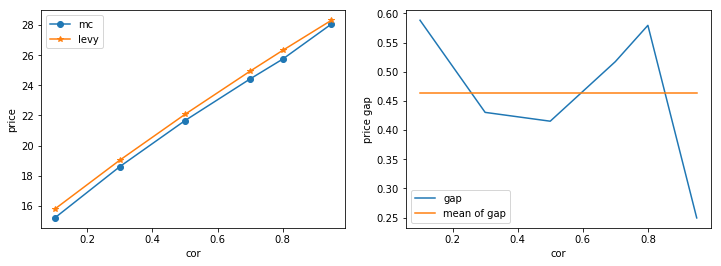

In [15]:
#(a) varing the correlations
corRange=[0.1,0.3,0.5,0.7,0.8,0.95]

mcList=[]
levyList=[]

for cor in corRange:
    cor_m = (1-cor)*np.identity(4) + cor*np.ones((4,4))
    basket4a = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4a.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'cor',corRange)

             levy         mc       gap
strike                                
50      57.178289  55.740381  1.437908
60      51.216091  51.367957 -0.151865
70      46.004195  45.929599  0.074595
80      41.442261  40.342207  1.100054
90      37.439973  38.179518 -0.739545
100     33.918719  35.310989 -1.392270
110     30.811178  30.278964  0.532214
120     28.060128  28.258487 -0.198360
130     25.617067  25.982966 -0.365899
140     23.440897  23.718238 -0.277342
150     21.496738  21.929010 -0.432272
------DEV------
0.769410903182


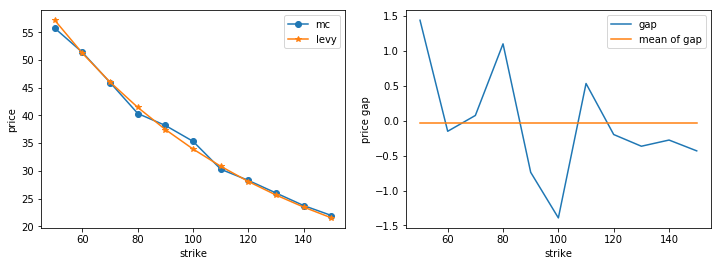

In [16]:
#(b) varing the strikes
strikeRange=range(50,160,10)

mcList=[]
levyList=[]
basket4b = basket_Levy.Basket(vol, weights, cor_m, divr)
for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4b.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

             levy         mc       gap
foward                                
50       3.586708   3.721961 -0.135253
60       5.991468   6.825004 -0.833536
70       9.025726   9.384748 -0.359021
80      12.651599  13.297306 -0.645707
90      16.824137  17.345778 -0.521640
100     21.496738  21.463403  0.033335
110     26.624042  27.121455 -0.497413
120     32.163392  33.633727 -1.470335
130     38.075470  37.366327  0.709143
140     44.324480  44.103540  0.220941
150     50.878078  49.544629  1.333449
------DEV------
0.755056855089


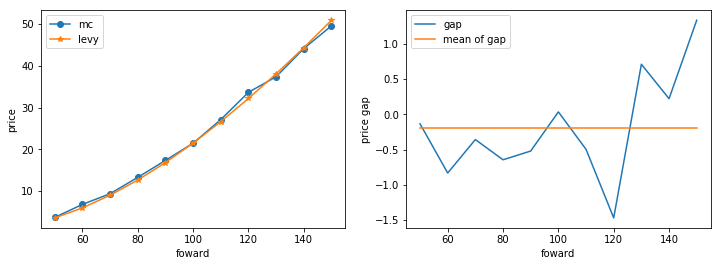

In [17]:
#(c) varing the fowards
fowardsRange=range(50,160,10)

mcList=[]
levyList=[]
basket4c = basket_Levy.Basket(vol, weights, cor_m, divr)
for foward in fowardsRange:
    spot=np.ones(4)*foward
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4c.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'foward',fowardsRange)

            levy         mc        gap
vol                                   
0.05    6.560542   6.651537  -0.090996
0.10   13.101444  13.276368  -0.174924
0.15   19.603245  19.502974   0.100271
0.20   26.046830  25.384437   0.662393
0.30   38.685633  40.756385  -2.070752
0.40   50.878078  50.416849   0.461229
0.50   62.499724  63.234822  -0.735098
0.60   73.445176  69.012580   4.432597
0.70   83.630756  85.188601  -1.557845
0.80   92.996008  98.944493  -5.948485
1.00  109.140850  92.510647  16.630203
------DEV------
5.55592839276


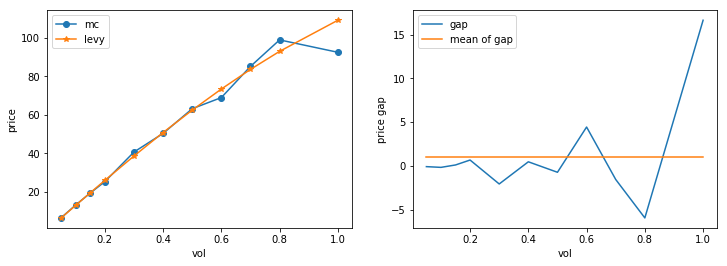

In [18]:
#(d1) varing the volatility, σi is set to the same value σ,which is
#varied between 5% and 100%.
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.ones(4) * vol
    basket4d1 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d1.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)

            levy         mc        gap
vol                                   
0.05    6.560542   6.640785  -0.080243
0.10   11.487266  11.607784  -0.120518
0.15   16.449809  16.305479   0.144330
0.20   21.472822  20.716004   0.756818
0.30   31.785869  31.613759   0.172110
0.40   42.528137  39.631017   2.897120
0.50   53.647150  48.295451   5.351699
0.60   64.913074  53.104915  11.808159
0.70   75.972769  60.339306  15.633463
0.80   86.464619  74.023437  12.441182
1.00  104.795749  86.898050  17.897698
------DEV------
9.02837225322


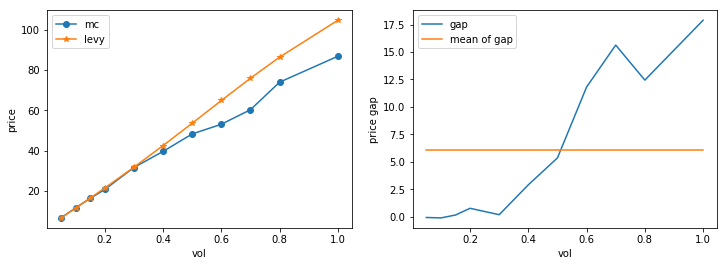

In [19]:
#(d2) varing the volatility, fix σ1 = 5% and vary the remaining volatilities
#symmetrically.
#varied between 5% and 100%.
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.array([0.05,vol,vol,vol])
    basket4d2 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d2.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)

            levy          mc        gap
vol                                    
0.05   83.260647   44.338455  38.922193
0.10   83.469115   31.315795  52.153320
0.15   83.741577   39.807728  43.933849
0.20   84.088970   42.479643  41.609328
0.30   85.062448   57.314884  27.747563
0.40   86.512804   62.113768  24.399036
0.50   88.571469   67.056659  21.514810
0.60   91.342153   84.396464   6.945688
0.70   94.861552   88.339005   6.522548
0.80   99.083086   85.587481  13.495605
1.00  109.140850  110.768517  -1.627667
------DEV------
30.1513143727


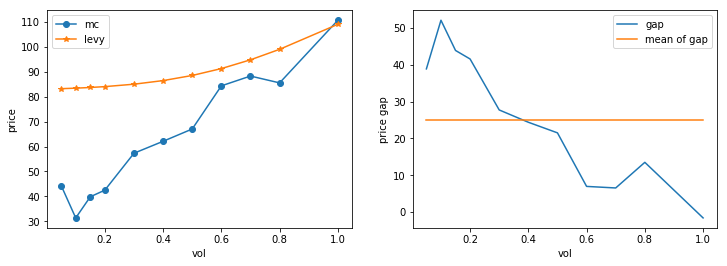

In [20]:
#(d3) varing the volatility, fix σ1 =100% and vary the remaining volatilities
#symmetrically.
#varied between 5% and 100%.
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.array([1,vol,vol,vol])
    basket4d1 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d1.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)